In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
#数据加载
df=pd.read_excel(r"C:\Users\yaoyao tang\Desktop\ML-hydrothermal\experiment_dataset.xlsx",sheet_name='Sheet1')

In [2]:
xs=df.columns
print(xs)

Index(['邻苯二胺', '络氨酸', '浓度', '体积', '温度', '时间', 'Ex', 'Em1', 'Em2', 'QY'], dtype='object')


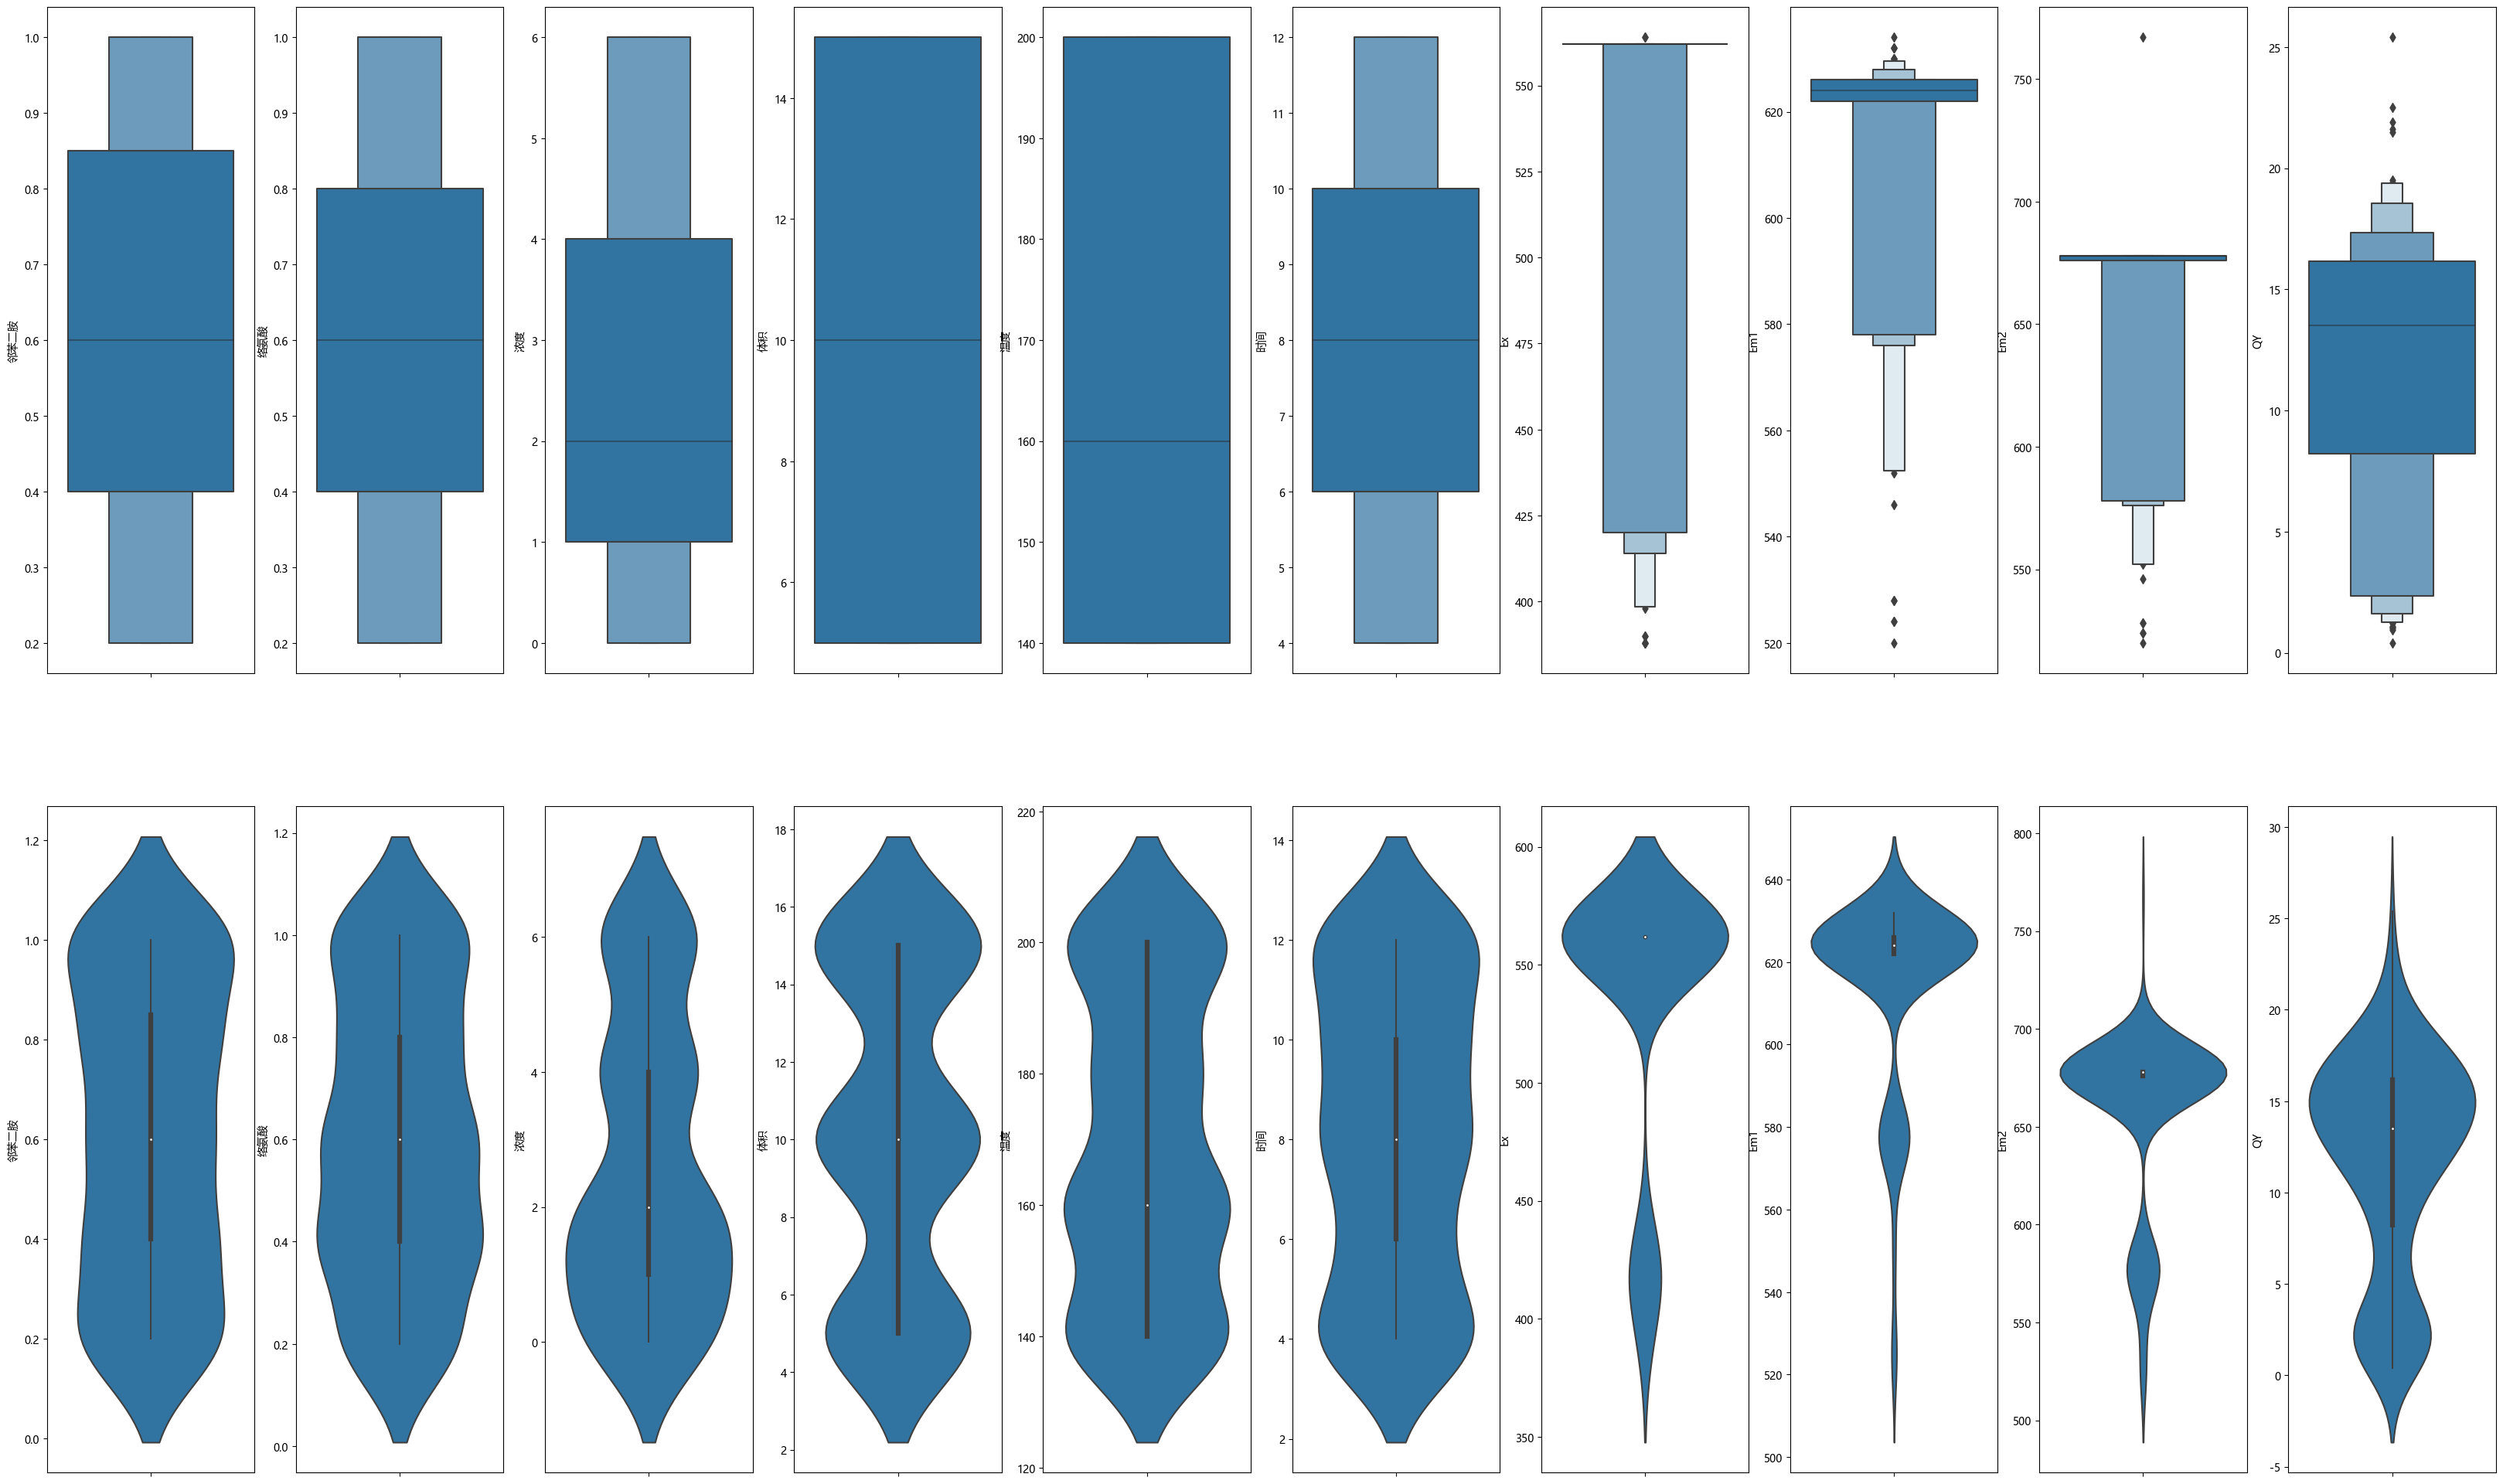

In [4]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
for i,col in enumerate(xs):
    plt.subplot(2,len(xs),i+1)
    sns.boxenplot(y=col,data=df)
    plt.subplot(2,len(xs),i+len(xs)+1)
    sns.violinplot(y=col,data=df)
plt.subplots_adjust(left=0.05,bottom=0.05,right=5,top=4)
plt.show()

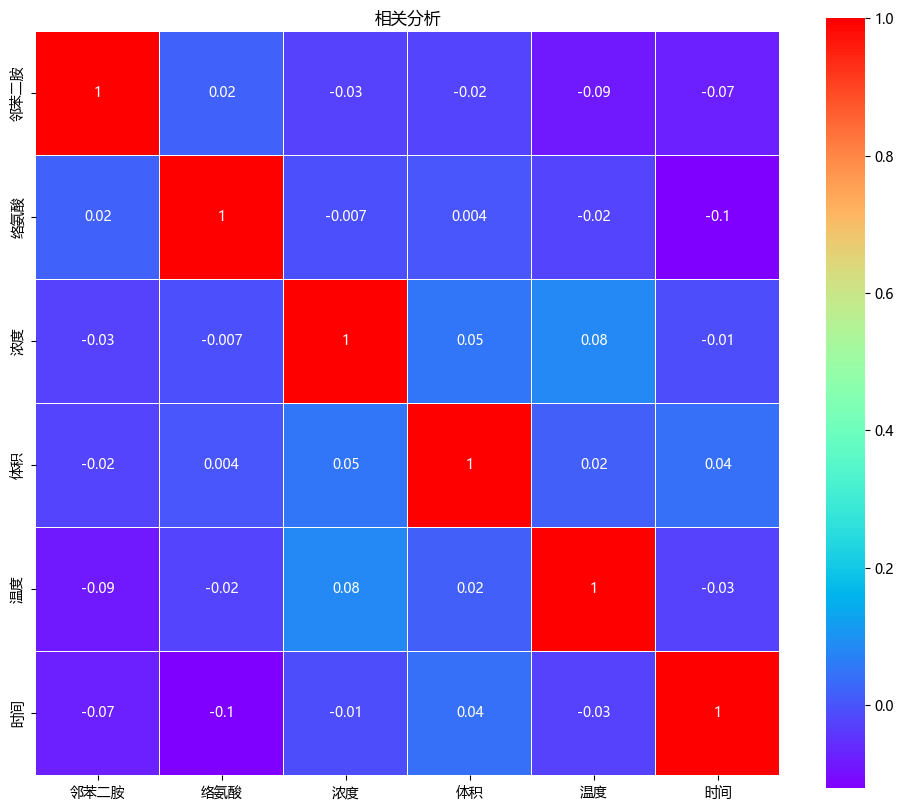

In [16]:
f, ax = plt.subplots(figsize = (12,10))#figsize = (12,10)
new_df=df.iloc[:,:6]
sns.heatmap(new_df.corr(method='pearson'), linewidths = 0.05, ax = ax,  cmap='rainbow',square=True,annot=True,fmt='.1g')
ax.set_title('相关分析')
plt.show()

In [17]:
new_df["r1_2"]=df["邻苯二胺"]/df["络氨酸"]
new_df.head()

,邻苯二胺,络氨酸,浓度,体积,温度,时间,r1_2
0,0.6,0.4,2,15,200,10,1.5
1,0.8,0.8,4,15,140,12,1.0
2,1.0,1.0,2,15,140,10,1.0
3,0.8,0.8,2,10,180,4,1.0
4,1.0,1.0,6,15,160,12,1.0


In [18]:
new_df["QY"]=df["QY"]
new_df.head()

,邻苯二胺,络氨酸,浓度,体积,温度,时间,r1_2,QY
0,0.6,0.4,2,15,200,10,1.5,15.5
1,0.8,0.8,4,15,140,12,1.0,15.0
2,1.0,1.0,2,15,140,10,1.0,19.3
3,0.8,0.8,2,10,180,4,1.0,14.6
4,1.0,1.0,6,15,160,12,1.0,14.5


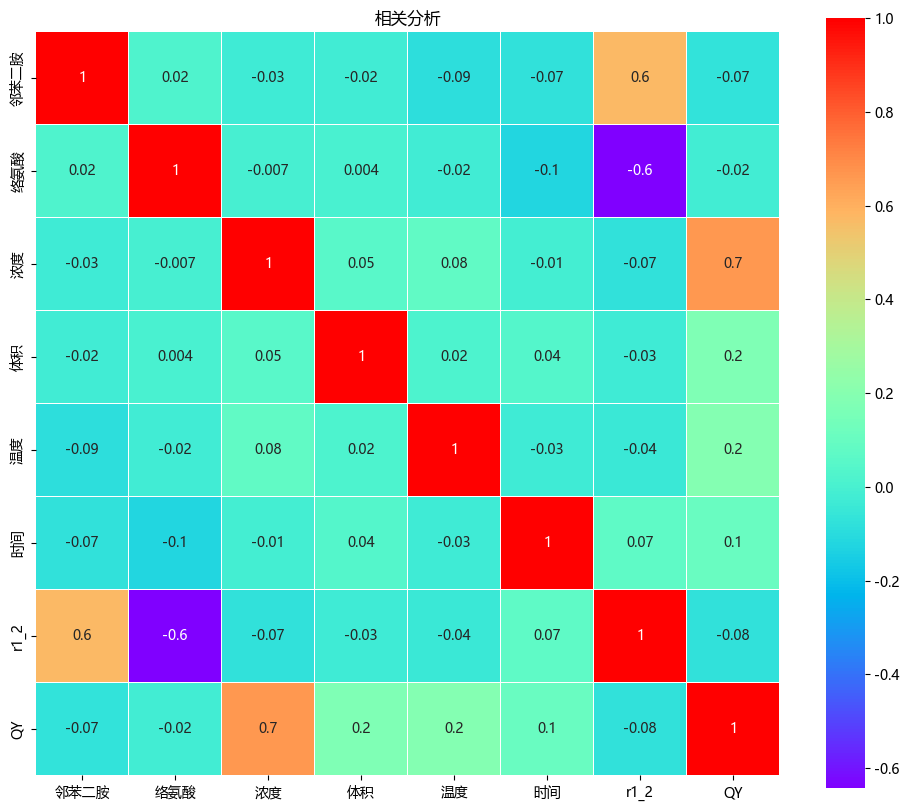

In [19]:
f, ax = plt.subplots(figsize = (12,10))#figsize = (12,10)
sns.heatmap(new_df.corr(method='pearson'), linewidths = 0.05, ax = ax,  cmap='rainbow',square=True,annot=True,fmt='.1g')
ax.set_title('相关分析')
plt.show()

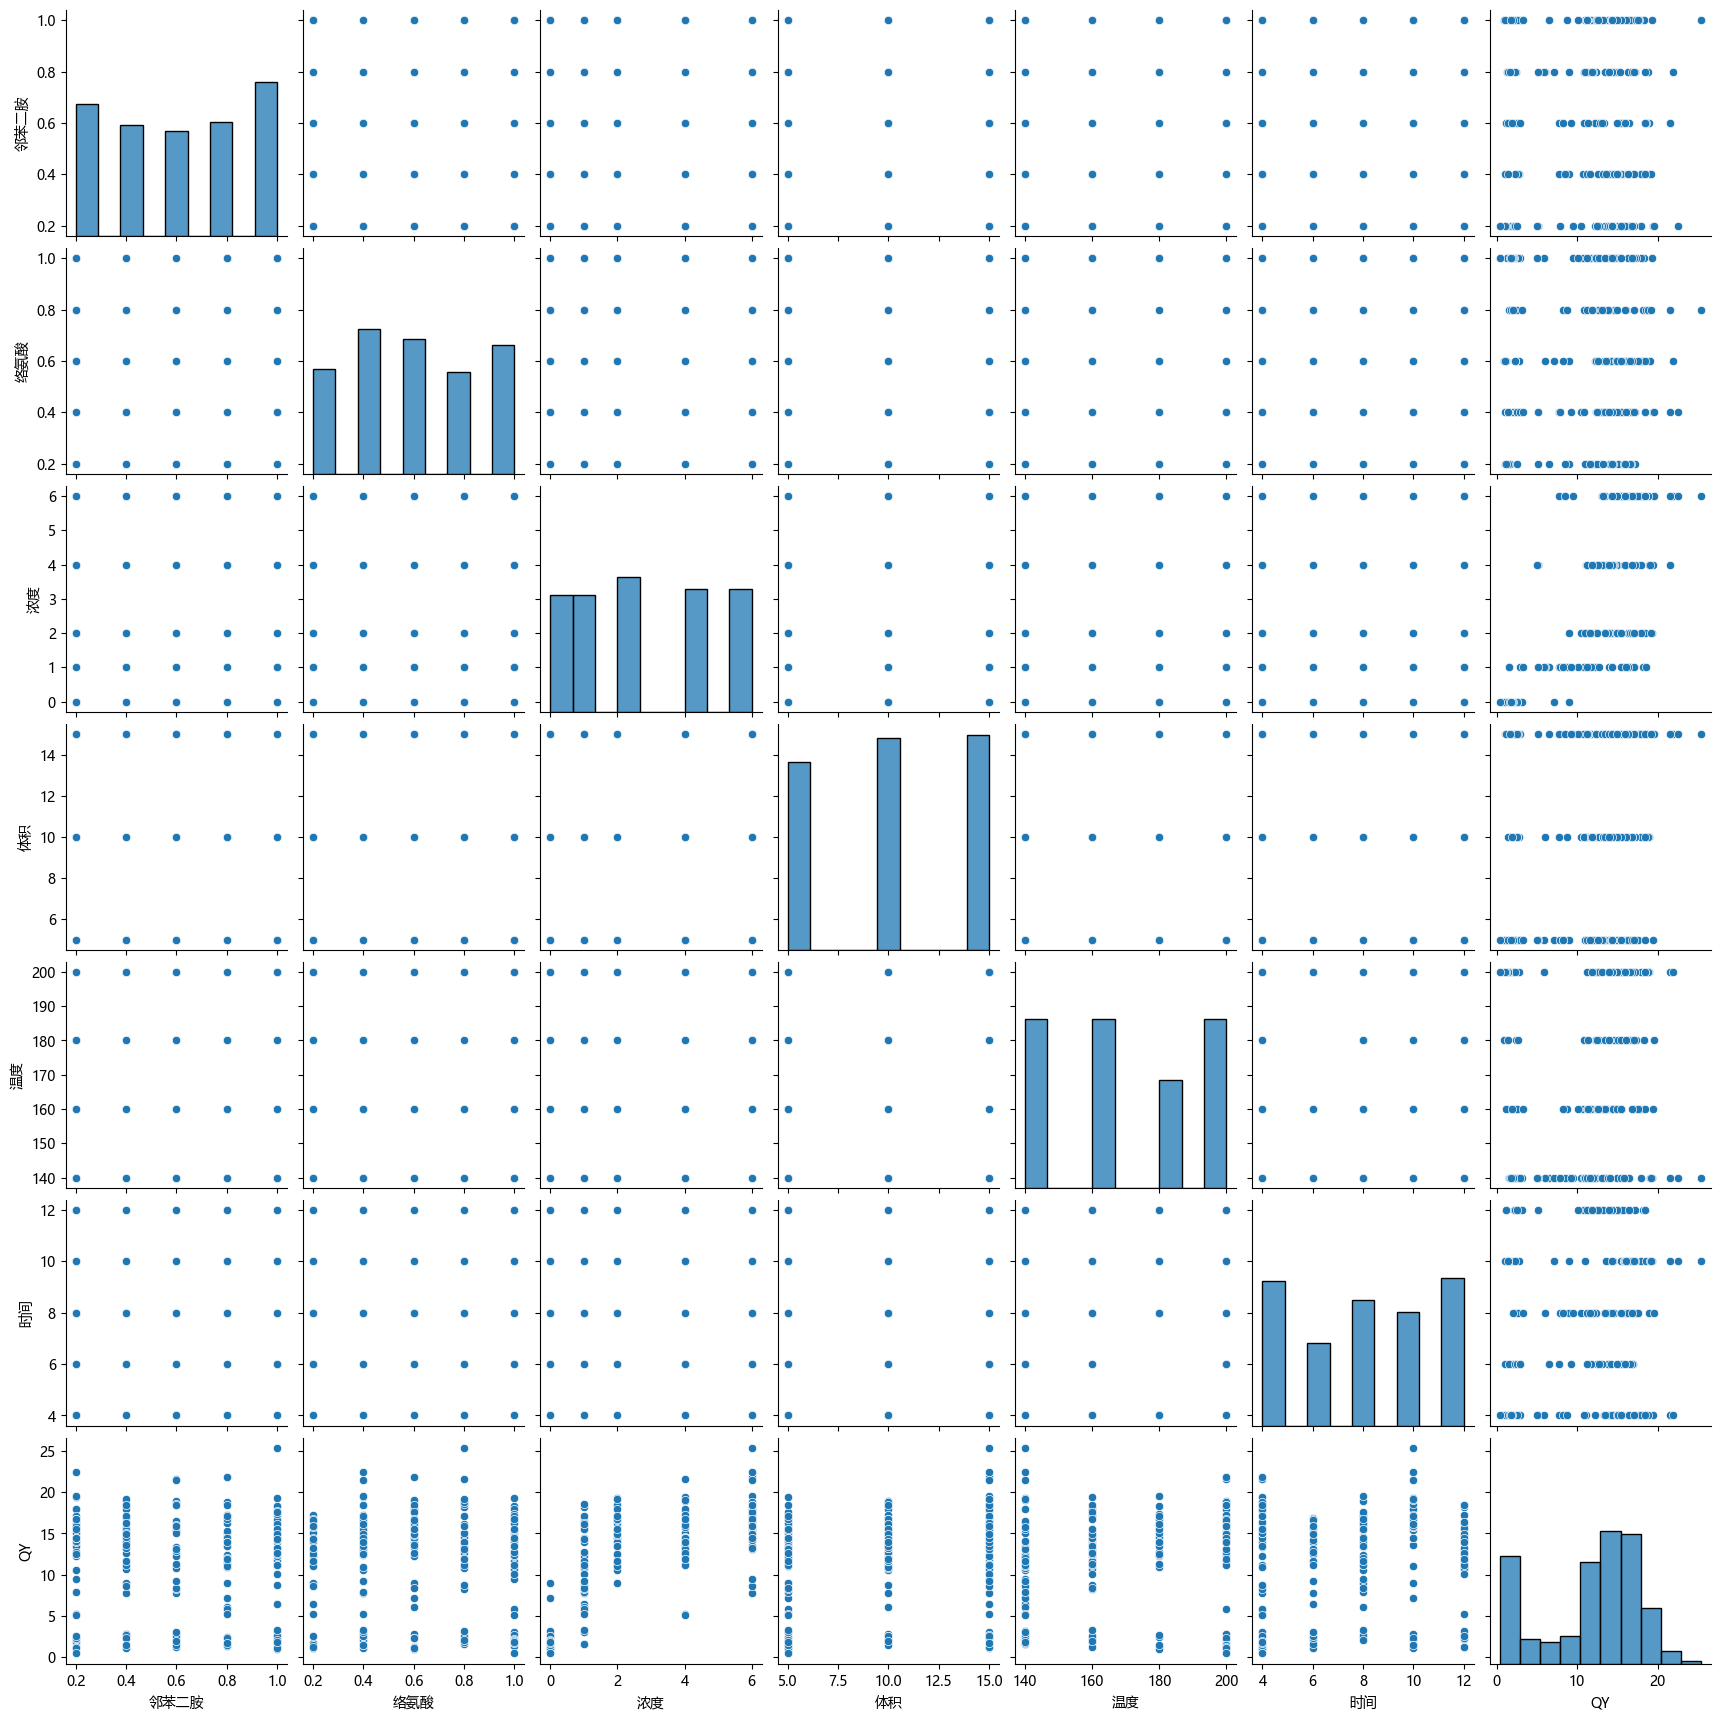

In [10]:
sns.pairplot(data=new_df)
plt.show()

In [20]:
#计算灰色关联系数研究
x=new_df.T

# 1、数据均值化处理
x_mean=x.mean(axis=1)
for i in range(x.index.size):
    x.iloc[i,:] = x.iloc[i,:]/x_mean[i]

# 2、提取参考队列和比较队列
ck=x.iloc[-1,:]
cp=x.iloc[:-1,:]

# 比较队列与参考队列相减
t=pd.DataFrame()
for j in range(cp.index.size):
    temp=pd.Series(cp.iloc[j,:]-ck)
    t=t.append(temp,ignore_index=True)

#求最大差和最小差
mmax=t.abs().max().max()
mmin=t.abs().min().min()
rho=0.5
#3、求关联系数
ksi=((mmin+rho*mmax)/(abs(t)+rho*mmax))


#4、求关联度
r=ksi.sum(axis=1)/ksi.columns.size

#5、关联度排序，得到结果
result=r.sort_values(ascending=False)

In [21]:
print(result)#输入参数与斯托克斯位移的关系

4    0.836473
3    0.810584
5    0.805130
2    0.795568
1    0.773078
0    0.769867
6    0.728225
dtype: float64


In [24]:
#研究输入参数与LT之间的相关性
from scipy.stats import pearsonr

col_list=new_df.columns
for i in range(8):
    cor,p = pearsonr(new_df[col_list[i]],new_df["QY"])
    print(cor)

-0.06780508107717635
-0.016618860859139592
0.6647695299511635
0.17480404388746584
0.19736071655528256
0.10546347200574235
-0.07687954404463516
0.9999999999999996


In [27]:
#热力图
import datetime
import os
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
def set_fig_fonts(SMALL_SIZE=22, MEDIUM_SIZE=24,BIGGER_SIZE = 26):
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


def plot_correlation_matrix(X,title, col_list):
    
    set_fig_fonts(12,14,16)
    # standardization
    scaler = StandardScaler()
    df_transf = scaler.fit_transform(X)
    df = pd.DataFrame(df_transf,columns = col_list)
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('coolwarm', 30)
    #cax = ax1.pcolor(df.corr(), cmap=cmap, vmin=-1, vmax=1)
    mat = df.corr()
    flip_mat = mat.iloc[::-1]

    
    cax = ax1.imshow(flip_mat , interpolation="nearest", cmap=cmap,vmin=-1, vmax=1)
    ax1.grid(True)
    #plt.suptitle('Features\' Correlation', y =0)
    labels=df.columns.tolist()
    x_labels = labels.copy()
    labels.reverse()

    #ax1.xaxis.set_ticks_position('top')
    ax1.set_xticks(np.arange(len(labels)))#np.arange(len(labels))
    ax1.set_yticks(np.arange(len(labels)))  
    # want a more natural, table-like display
    #ax1.xaxis.tick_top()
    ax1.set_xticklabels(x_labels, rotation = -45, ha="left") #, , rotation = 45,horizontalalignment="left"
    ax1.set_yticklabels(labels, ha="right")
    
    #plt.xticks(rotation=90)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, boundaries=np.linspace(-1,1,21),ticks=np.linspace(-1,1,5))
    plt.savefig("photo/feature_confusion_matrix.png",dpi=500,bbox_inches = 'tight')#解决图片不清晰，不完整的问题
    plt.show()

C:\Users\yaoyao tang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37051 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yaoyao tang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33519 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yaoyao tang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yaoyao tang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33018 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yaoyao tang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yaoyao tang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: Runtim

FileNotFoundError: [Errno 2] No such file or directory: 'photo/feature_confusion_matrix.png'

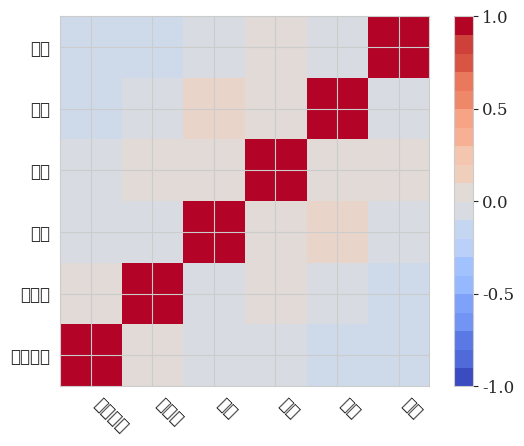

In [26]:
X=df.iloc[:,:6]
col_list=X.columns
from sklearn.preprocessing import StandardScaler
plot_correlation_matrix(X,'carbon_dot', col_list)